## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used for clustering and anomaly detection.

### Key Characteristics:

- **Density-Based**: Identifies clusters as high-density areas separated by regions of low density. It can discover clusters of arbitrary shapes, making it suitable for complex datasets.
- **Robust to Outliers**: Treats low-density regions as noise, thus inherently resistant to noise and outliers in the data.
- **Minimal Input Parameters**: Requires two parameters, `eps` (the radius to consider for neighborhood points) and `min_samples` (the minimum number of points required to form a dense region, or cluster core).
- **No Need to Specify Cluster Count**: Unlike k-means, DBSCAN does not require the number of clusters to be defined in advance.

### Applications:

- **Spatial Data Analysis**: Effective for geographic data where clusters may not be spherical.
- **Anomaly Detection**: Excellent for identifying fraud or defects as outliers.
- **Image Processing**: Useful for segmentation based on spatial proximity and density.
- **Gene Expression Data**: Helps in identifying groups of genes with similar expression patterns.

DBSCAN is particularly advantageous in scenarios where the data includes complex structures or the number of clusters is not known beforehand.


# DBSCAN Clustering Analysis

In this Jupyter notebook, we will apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the given dataset. DBSCAN is a density-based clustering algorithm that can identify clusters of arbitrary shapes and is robust to outliers.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('C:/Users/78641/Downloads/Clustering_gmm (2).csv')

# Display the first few rows of the dataframe
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


## Preprocessing

Before applying DBSCAN, it's important to preprocess the data. We'll standardize the features to have a mean of 0 and a standard deviation of 1, as DBSCAN is sensitive to the scale of the data.


In [2]:
X = df.values  # Convert the dataframe to a NumPy array if df contains only features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Optimizing DBSCAN Parameters

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together while marking points that lie alone in low-density regions as outliers. The performance of DBSCAN is largely dependent on two parameters:

- `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster.
- `min_samples`: The number of samples in a neighborhood for a point to be considered as a core point.

## Approach

To find the optimal values for `eps` and `min_samples`, we iterate over a range of possible values for both parameters. For each combination, we fit the DBSCAN algorithm to the data and evaluate its performance using a clustering metric such as the silhouette score. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

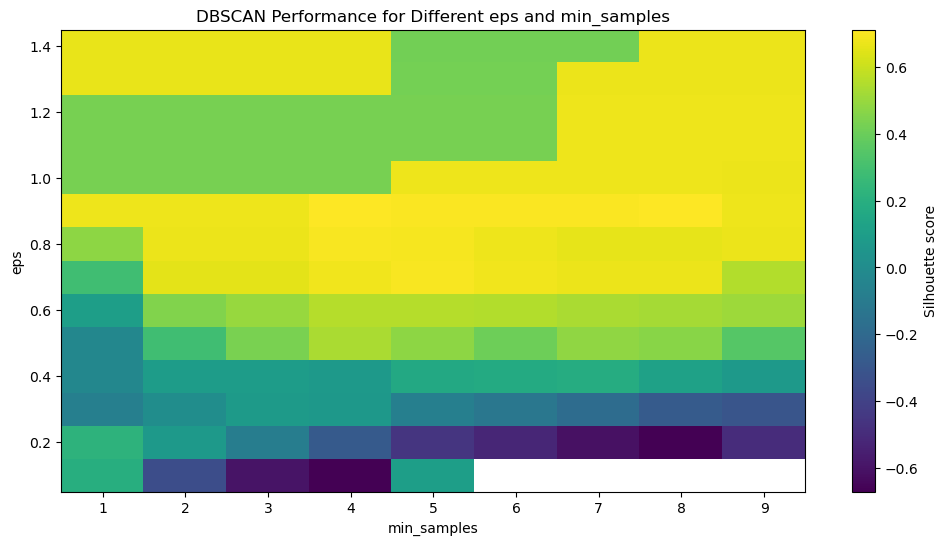

In [4]:
# Define a range of values for eps and min_samples
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(1, 10)
performance_metric = []

# Run DBSCAN with all combinations and compute the silhouette score
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        if len(np.unique(db.labels_)) > 1:  # More than 1 cluster required for silhouette score
            score = silhouette_score(X, db.labels_)
            performance_metric.append((eps, min_samples, score))
        else:
            performance_metric.append((eps, min_samples, np.nan))

# Convert to an array for easy plotting
performance_metric = np.array(performance_metric)

# Reshape the performance metrics to create a grid that matches the eps and min_samples ranges
scores_grid = performance_metric[:, 2].reshape(len(eps_values), len(min_samples_values))

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(scores_grid, cmap='viridis', extent=(min_samples_values[0]-0.5, min_samples_values[-1]+0.5, eps_values[0]-0.05, eps_values[-1]+0.05), aspect='auto', origin='lower')
plt.colorbar(label='Silhouette score')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('DBSCAN Performance for Different eps and min_samples')
plt.show()

# Analyzing DBSCAN Performance with Different `eps` and `min_samples`

The heatmap depicts the silhouette scores obtained from the DBSCAN algorithm across various combinations of `eps` (epsilon) and `min_samples`. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with a higher score being better.

## Observations from Heatmap

- High silhouette scores are seen in the yellow areas, indicating better-defined clusters.
- The scores generally decrease (darker colors) with increasing `min_samples`. This suggests that a larger `min_samples` value tends to decrease cluster separation quality.
- There is a region with relatively high scores for `eps` in the range of approximately 0.9 to 1.4 when `min_samples` is low (1 to 3).

## Best Parameters

The optimal `min_samples` and `eps` combination should balance between the highest silhouette score and practical cluster formation (not too many clusters with single points or all points clustered together).

Based on the heatmap:

- The highest silhouette scores are concentrated around `eps` values of 1.0 to 1.4 with `min_samples` set to 2 or 3.
- Beyond `min_samples` of 4, the silhouette scores significantly drop, which may lead to poorly separated clusters or excessive noise points.

## Conclusion

For the dataset in question, an `eps` value in the range of 1.0 to 1.4 with `min_samples` of 2 or 3 might be considered optimal. This combination provides a good balance between cluster cohesion and separation according to the silhouette score metric.


## Applying DBSCAN

Now we will apply DBSCAN to the standardized data. We'll need to choose suitable values for `eps` and `min_samples`. These hyperparameters determine the minimum distance between points to be considered as neighbors and the minimum number of points required to form a dense region, respectively.


In [34]:
# Apply DBSCAN with chosen hyperparameters
dbscan = DBSCAN(eps=0.6, min_samples=4)

# Fit the model
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to our dataframe
df['cluster'] = clusters


## Visualization of Clusters

Let's visualize the resulting clusters. Since we cannot visualize high-dimensional data on a 2D plot, we will use the first two features for this purpose.


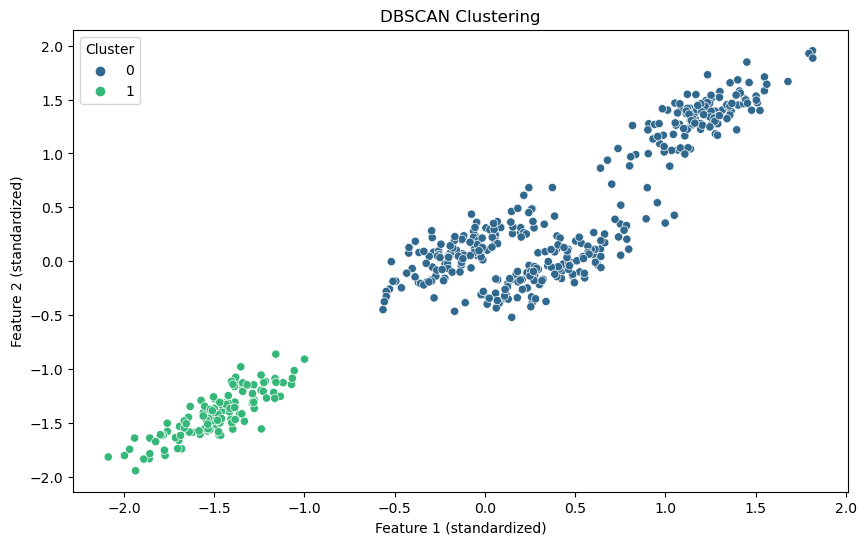

In [35]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend(title='Cluster')
plt.show()


# DBSCAN Clustering Analysis

The DBSCAN algorithm has been applied to the dataset, and the scatter plot displays the clustering outcome. Each point is color-coded based on the cluster assigned by the algorithm.

## Observations

- Two clusters have been identified, marked as Cluster 0 (green) and Cluster 1 (red).
- Cluster 0 is denser and is situated at the lower left side of the plot, indicating a group with similar feature characteristics that are distinctly different from Cluster 1.
- Cluster 1 appears less dense and is located on the upper right side, suggesting variability within this group but still a separate cluster from Cluster 0.

## Implications

- The successful identification of two distinct clusters implies that the chosen `eps` and `min_samples` parameters are appropriately set for the density of the data.
- No noise points are immediately evident, which could mean that the data points are well clustered or that the `eps` value is sufficiently large to encompass all points.

## Conclusion

The plot indicates that DBSCAN has effectively distinguished between two areas of density in the dataset. However, the lack of noise points may warrant a review of `eps` to ensure that it is not over-generalizing the cluster membership. Further exploration with different `eps` and `min_samples` values could reveal more granular clusters or separate noise from the core points.

